In [1]:
# Dependencies and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import SQL Alchemy
from sqlalchemy import create_engine

# Import URI
from config import database


In [2]:
# Create a connection to a Postgresql database
engine = create_engine(database)
connection = engine.connect()


In [3]:
# Query all records in the Salaries table in the Database
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)


In [4]:
# Check for completeness
salaries_df.count()


emp_no    300024
salary    300024
dtype: int64

In [5]:
# Preview the data
salaries_df.head(5)


,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


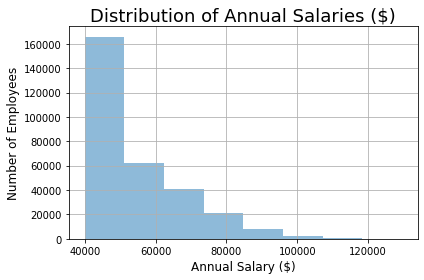

In [6]:
# Create a histogram to visualize the most common salary ranges for employees.
salary_data = salaries_df['salary']

hist = salary_data.hist(bins = 8, alpha = 0.5)
plt.title('Distribution of Annual Salaries ($)', fontsize=18)
plt.xlabel('Annual Salary ($)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.tight_layout()
plt.show()


In [7]:
# Create combined dataframe for bar chart.

# Query all records in the Employees table in the Database
employees_df = pd.read_sql("SELECT * FROM employees", connection)

# Query all records in the Titles table in the Database
titles_df = pd.read_sql("SELECT * FROM titles", connection)

# Rename column in Employees dataframe for merge with Titles dataframe
employees_df = employees_df.rename({"emp_titleid":"titleid"}, axis=1) 

# Merge the columns of Emmployees and Salaries dataframes
combined_df = pd.merge(employees_df, salaries_df, on="emp_no", how="inner")

full_df = pd.merge(combined_df, titles_df, on="titleid", how="inner")


In [8]:
# Check for completeness
full_df.head(5)


,emp_no,titleid,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000.0,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000.0,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087.0,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084.0,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016.0,Staff


In [9]:
# Preview the data
full_df.count()


emp_no        300024
titleid       300024
birth_date    300024
first_name    300024
last_name     300024
sex           300024
hire_date     300024
salary        300024
title         300024
dtype: int64

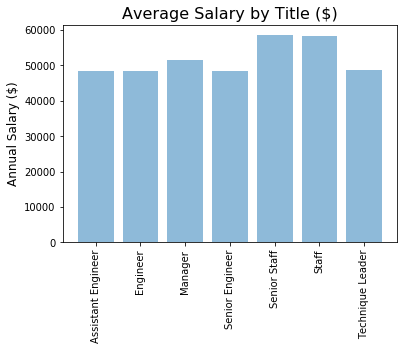

In [10]:
# Create a bar chart of average salary by title.
avg_salary = full_df.groupby("title").salary.mean()
x_axis = avg_salary.index

plt.bar(x_axis, avg_salary, alpha = 0.5)
plt.title('Average Salary by Title ($)', fontsize=16)

plt.ylabel('Annual Salary ($)', fontsize=12)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = 90)

plt.show()
